## REGRESION LINEAL

In [31]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import math 

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Gráficos
# ==============================================================================
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools

# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols


#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics




# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [32]:
df= pd.read_csv("Bicicletas_limpio.csv", index_col = 0)
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [33]:
df.set_index('instant')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


## REEMPLAZAR OUTLIERS

In [34]:
df_sin_outliers= df.copy()

In [35]:
df_sin_outliers.set_index('instant')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [36]:
def detectar_outliers(lista_columnas, df_sin_outliers): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = df_sin_outliers[(df_sin_outliers[col] < Q1 - outlier_step) | (df_sin_outliers[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [37]:
columnas_numeric = df.select_dtypes(include = np.number)

In [38]:
lista_columnas = list(columnas_numeric)

In [39]:
ind = detectar_outliers(lista_columnas, df_sin_outliers)
print(ind)

{'holiday': [16, 51, 104, 149, 184, 247, 282, 314, 327, 359, 366, 380, 415, 470, 512, 549, 610, 645, 680, 690, 723], 'hum': [49, 68], 'windspeed': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720], 'casual': [148, 183, 184, 196, 246, 281, 440, 446, 454, 455, 461, 468, 469, 475, 489, 496, 503, 504, 510, 511, 512, 517, 518, 524, 531, 532, 538, 539, 549, 559, 567, 580, 594, 608, 609, 616, 622, 629, 630, 636, 643, 657, 664, 679]}


In [40]:
numericas = df_sin_outliers.select_dtypes(include = np.number)

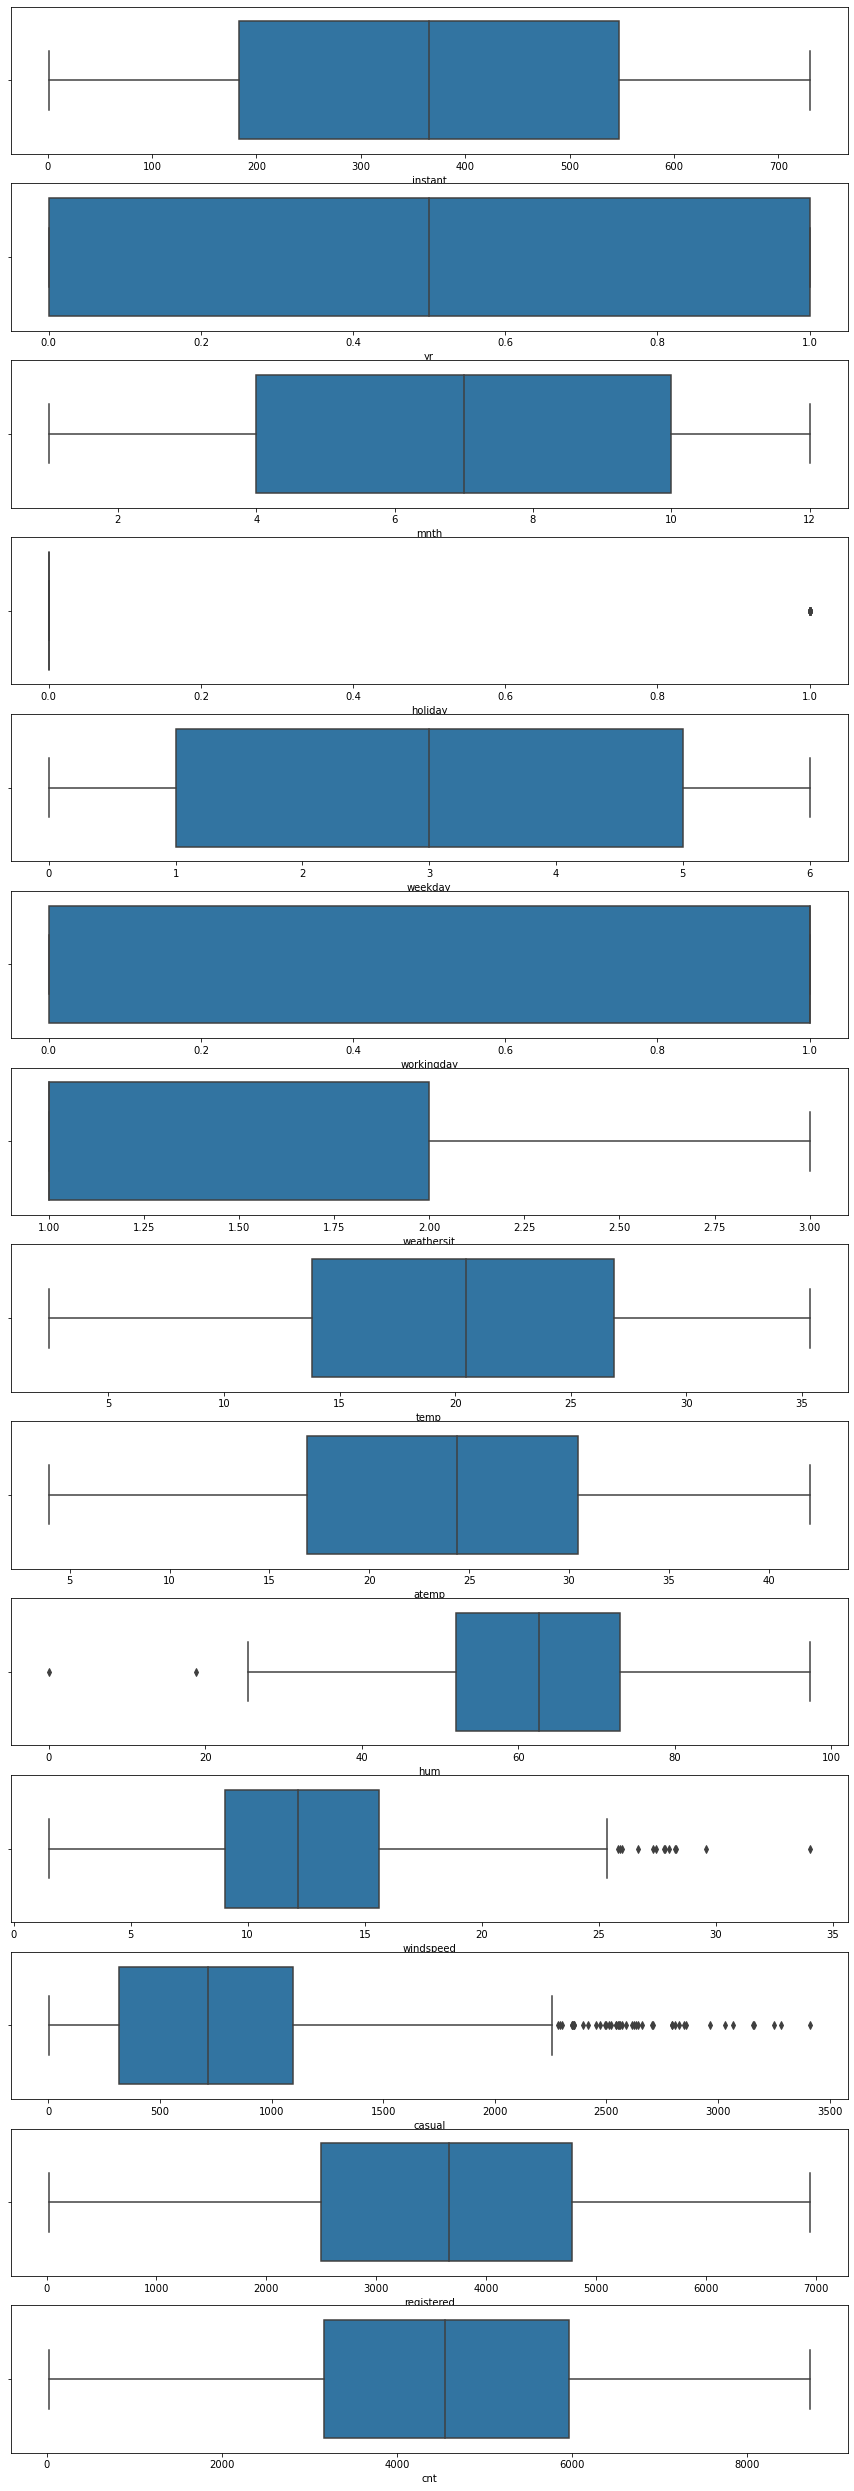

In [41]:
fig, axes = plt.subplots(14, 1, figsize=(15,45))

for i, col in enumerate(columnas_numeric):
    sns.boxplot(x = numericas.columns[i], data = df_sin_outliers, ax=axes[i]); # para trazar una línea de densidad

plt.show()

        Solo tiene sentido reemplzar los outliers de hum y windspeed por la mediana (temperatura no tiene outliers)

In [42]:
for key, values in ind.items():
     median = df_sin_outliers[key].median()
     if key == "holiday":
         pass
     elif key == "hum" or key == 'windspeed':
         for i in values: 
             df_sin_outliers.loc[i,key] = median
     else:
         df_sin_outliers.loc[i,key] = median 

# Hacemos el tratamiento de las variables categoricas
1. Encoding para la variable season
2. Eliminamos la variable date
3. Ponemos como categoricas las columnas:
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit

In [43]:
## Cambio tipo variable

df_sin_outliers["yr"] = df_sin_outliers["yr"].astype('category')
df_sin_outliers["mnth"] = df_sin_outliers["yr"].astype('category')
df_sin_outliers["holiday"] = df_sin_outliers["holiday"].astype('category')

In [44]:
df_sin_outliers["weekday"] = df_sin_outliers["weekday"].astype('category')
df_sin_outliers["workingday"] = df_sin_outliers["workingday"].astype('category')
df_sin_outliers["weathersit"] = df_sin_outliers["workingday"].astype('category')

In [45]:
mapa_season = {"spring": 0,"summer": 1, "autumn": 2, "winter": 3} #asigno a cada estacion un valor
df_sin_outliers["season"] = df_sin_outliers["season"].map(mapa_season)#asigno a la columna los valores

In [46]:
df_sin_outliers.season.unique()#comprobamos que remplazamos los valores de forma correcta

array([0, 1, 2, 3])

In [47]:
## Eliminamos las columnas q no usaremos
df_sin_outliers.drop(columns = ['dteday', "instant"],inplace=True)

# Comprobación de las asunciones

## Asunción de normalidad

| Test Shapiro  |  Resultado | Conclusión |
|---|---|---|
|  p-value > 0.05 | No significativo   | Datos  Normales|
|p-value < 0.05| Significativo| Datos No Normales |

In [48]:
stats.shapiro(df_sin_outliers["casual"])

ShapiroResult(statistic=0.8852857351303101, pvalue=7.970257418077941e-23)

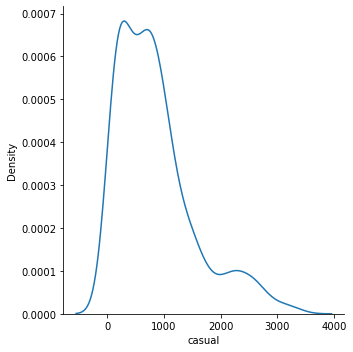

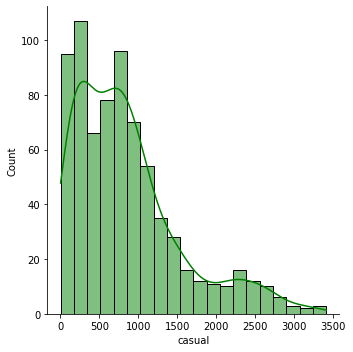

In [49]:
sns.displot(data=df_sin_outliers, x="casual", kind="kde")
sns.displot(df_sin_outliers["casual"], kde = True, color = "green");

In [50]:
df_sin_outliers['casual'], lambda_ajustada = stats.boxcox(df_sin_outliers['casual'])

In [51]:
stats.shapiro(df_sin_outliers["casual"])

ShapiroResult(statistic=0.9915967583656311, pvalue=0.0003671954618766904)

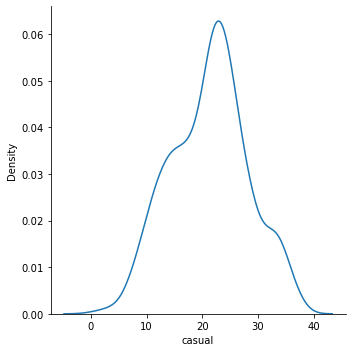

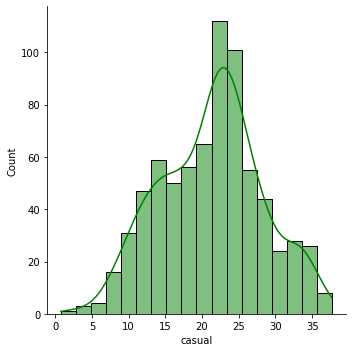

In [52]:
sns.displot(data=df_sin_outliers, x="casual", kind="kde")
sns.displot(df_sin_outliers["casual"], kde = True, color = "green");

In [53]:
stats.shapiro(df_sin_outliers["registered"])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

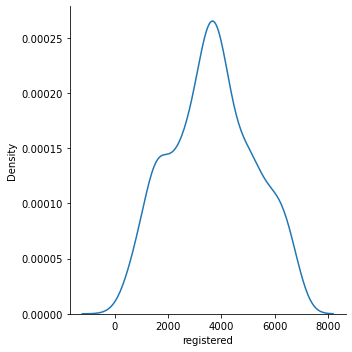

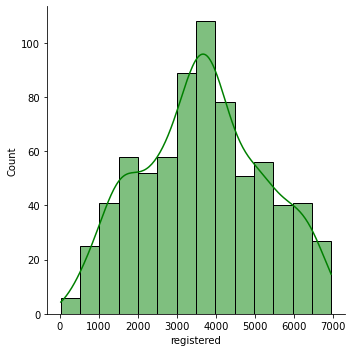

In [54]:
sns.displot(data=df_sin_outliers, x="registered", kind="kde")
sns.displot(df_sin_outliers["registered"], kde = True, color = "green");

In [55]:
df_sin_outliers['registered'], lambda_ajustada = stats.boxcox(df_sin_outliers['registered'])# usamos el boxcoc

In [56]:
stats.shapiro(df_sin_outliers["registered"])

ShapiroResult(statistic=0.9854231476783752, pvalue=1.1639369859040016e-06)

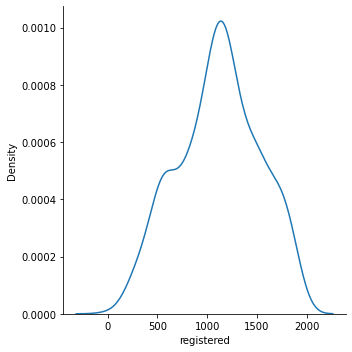

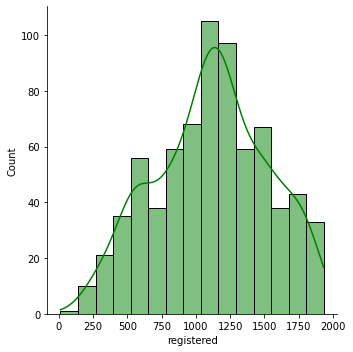

In [58]:
sns.displot(data=df_sin_outliers, x="registered", kind="kde")
sns.displot(df_sin_outliers["registered"], kde = True, color = "green");

In [59]:
stats.shapiro(df_sin_outliers["cnt"])

ShapiroResult(statistic=0.9802490472793579, pvalue=2.313480784721378e-08)

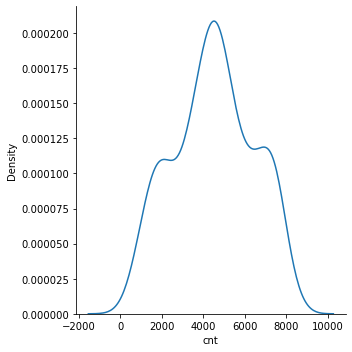

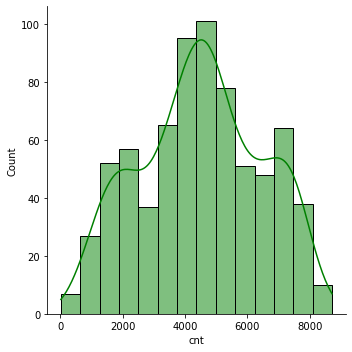

In [60]:
sns.displot(data=df_sin_outliers, x="cnt", kind="kde")
sns.displot(df_sin_outliers["cnt"], kde = True, color = "green");

In [61]:
df_sin_outliers['cnt'], lambda_ajustada = stats.boxcox(df_sin_outliers['cnt'])# usamos el boxcoc

In [62]:
stats.shapiro(df_sin_outliers["cnt"])

ShapiroResult(statistic=0.9801719784736633, pvalue=2.1925126603150602e-08)

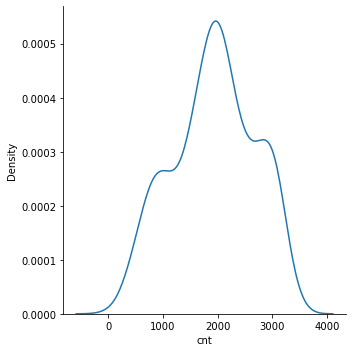

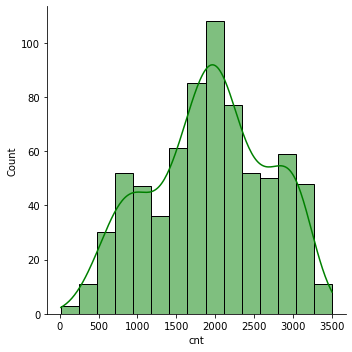

In [63]:
sns.displot(data=df_sin_outliers, x="cnt", kind="kde")
sns.displot(df_sin_outliers["cnt"], kde = True, color = "green");

        Analizando los pvalue de las tres variables que podriamos usar como predictoras: La variable casual es la de mejor resultado muy cercana al valor de normalidad. la segunda opción sería la variable registered y la última seria CNT.

## Asunción de homocedasticidad

Las varianzas no difieren entre las distintas categorías de nuestros datos


| Test Levene  |  Resultado | Conclusión   |
|---|---|---|
|  p-value > 0.05 | No significativo   | Cumple asunción, tienen varianzas similares|
|p-value < 0.05| Significativo| No cumple asunción, no tienen varianzas similares |

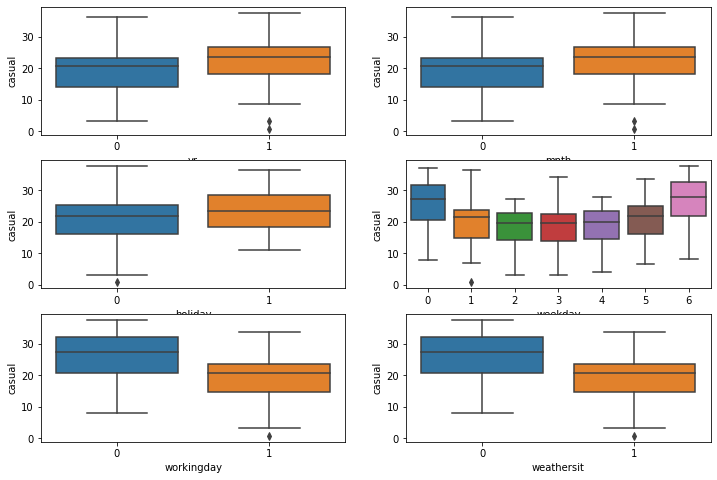

In [68]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 8))

axes = axes.flat

columnas_cat = df_sin_outliers.select_dtypes(include = ["object","category"]).columns

for i, colum in enumerate(columnas_cat):
    sns.boxplot(
    x       = colum,
    y       = 'casual',
    data    = df_sin_outliers,
    palette = 'tab10',
    ax      = axes[i]
    )

In [28]:
def datos_test_levene(columna, df_sin_outliers):
    valores = df_sin_outliers[columna].unique()
    d = {}
    for x in valores:
        d["{0}".format(x)] = df_sin_outliers[df_sin_outliers[columna] == x]["casual"]
    return d

In [29]:
levene_sexo = stats.levene(sexo['female'], sexo['male'], center='median')
levene_sexo

NameError: name 'sexo' is not defined

In [ ]:
levene_sexo = stats.levene(sexo['female'], sexo['male'], center='median')
levene_sexo

In [ ]:
levene_region = stats.levene(region['southwest'], region['southeast'], region['northwest'], region['northeast'], center='median')
levene_region

In [ ]:
levene_hijos = stats.levene(hijos['1'], hijos['2'], hijos['3'], hijos['4'], hijos['5'],  center='median')
levene_hijos